### Sequential Feature Selection 

**Expected Time: 60 minutes**

**Total Points: 70**

This activity focuses on using the stepwise feature selection approach outlined in video 9.3.  Here, your goal is to first generate polynomial features for a `degree = 3` model and limit them to a set number using the `SequentialFeatureSelection`. For more information on the selector see [here](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection). 

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data

The dataset used is from kaggle [here](https://www.kaggle.com/mirichoi0218/insurance) and contains information on insurance clients and their medical costs billed by the insurance company.  You will build regression models to predict the logarithm of the `charges`.    The dataset is loaded and displayed below, and the original target is plotted next to its resulting logarithm.   

In [2]:
insurance = pd.read_csv('data/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


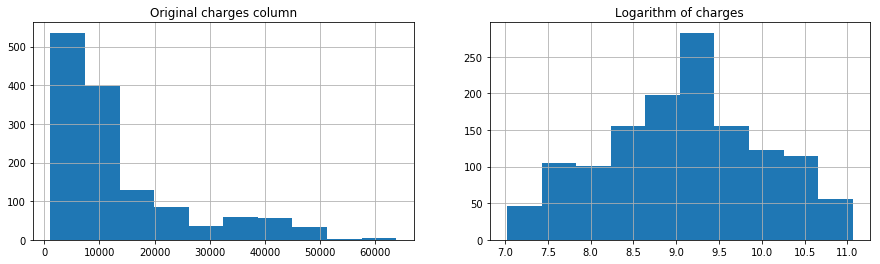

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(insurance['charges'])
ax[0].grid()
ax[0].set_title('Original charges column')
ax[1].hist(np.log1p(insurance['charges']))
ax[1].grid()
ax[1].set_title('Logarithm of charges');

[Back to top](#Index)

### Problem 1

#### Train/Test split

**Points: 10**

Create a train and test set using `train_test_split` and assign to `X_train`, `X_test`, `y_train`, `y_test` below with parameters:

- `test_size = 0.3`
- `random_state = 42`

The target data should be transformed according to the `np.log1p` function.  

In [6]:
### GRADED

X_train, X_test, y_train, y_test = '', '', '', ''

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(insurance.drop('charges', axis = 1), np.log1p(insurance.charges), 
                                                   random_state=42, test_size = 0.3)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

(936, 6)
(402, 6)


In [7]:
### BEGIN HIDDEN TESTS
X_train_, X_test_, y_train_, y_test_ = train_test_split(insurance.drop('charges', axis = 1), np.log1p(insurance.charges), 
                                                   random_state=42, test_size = 0.3)
#
#
#
pd.testing.assert_frame_equal(X_train, X_train_)
pd.testing.assert_series_equal(y_train, y_train_)
### END HIDDEN TESTS

[Back to top](#Index)

### Problem 2

#### Building `PolynomialFeatures`

**Points: 10**

To begin, create a `DataFrame` with the `degree = 3` features and interaction terms added for numeric columns. Assign the following objects to the variables:

- `poly_features`: Instantiate a `PolynomialFeatures` object for quadratic features without a bias term.
- `X_train_poly`: Fit and transformed features using `['age', 'bmi', 'children']`.  
- `X_test_poly`: Transformed test data using `['age', 'bmi', 'children']`.
- `poly_columns`: Column names of transformed data
- `train_df`: DataFrame with training features and column names.
- `test_df`: DataFrame with test features and column names

The DataFrame `train_df` should look like:

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>age</th>      <th>bmi</th>      <th>children</th>      <th>age^2</th>      <th>age bmi</th>      <th>age children</th>      <th>bmi^2</th>      <th>bmi children</th>      <th>children^2</th>      <th>age^3</th>      <th>age^2 bmi</th>      <th>age^2 children</th>      <th>age bmi^2</th>      <th>age bmi children</th>      <th>age children^2</th>      <th>bmi^3</th>      <th>bmi^2 children</th>      <th>bmi children^2</th>      <th>children^3</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>61.0</td>      <td>31.160</td>      <td>0.0</td>      <td>3721.0</td>      <td>1900.760</td>      <td>0.0</td>      <td>970.945600</td>      <td>0.00</td>      <td>0.0</td>      <td>226981.0</td>      <td>115946.360</td>      <td>0.0</td>      <td>59227.681600</td>      <td>0.0</td>      <td>0.0</td>      <td>30254.664896</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>1</th>      <td>46.0</td>      <td>27.600</td>      <td>0.0</td>      <td>2116.0</td>      <td>1269.600</td>      <td>0.0</td>      <td>761.760000</td>      <td>0.00</td>      <td>0.0</td>      <td>97336.0</td>      <td>58401.600</td>      <td>0.0</td>      <td>35040.960000</td>      <td>0.0</td>      <td>0.0</td>      <td>21024.576000</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>2</th>      <td>54.0</td>      <td>31.900</td>      <td>3.0</td>      <td>2916.0</td>      <td>1722.600</td>      <td>162.0</td>      <td>1017.610000</td>      <td>95.70</td>      <td>9.0</td>      <td>157464.0</td>      <td>93020.400</td>      <td>8748.0</td>      <td>54950.940000</td>      <td>5167.8</td>      <td>486.0</td>      <td>32461.759000</td>      <td>3052.8300</td>      <td>287.10</td>      <td>27.0</td>    </tr>    <tr>      <th>3</th>      <td>55.0</td>      <td>30.685</td>      <td>0.0</td>      <td>3025.0</td>      <td>1687.675</td>      <td>0.0</td>      <td>941.569225</td>      <td>0.00</td>      <td>0.0</td>      <td>166375.0</td>      <td>92822.125</td>      <td>0.0</td>      <td>51786.307375</td>      <td>0.0</td>      <td>0.0</td>      <td>28892.051669</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>4</th>      <td>25.0</td>      <td>45.540</td>      <td>2.0</td>      <td>625.0</td>      <td>1138.500</td>      <td>50.0</td>      <td>2073.891600</td>      <td>91.08</td>      <td>4.0</td>      <td>15625.0</td>      <td>28462.500</td>      <td>1250.0</td>      <td>51847.290000</td>      <td>2277.0</td>      <td>100.0</td>      <td>94445.023464</td>      <td>4147.7832</td>      <td>182.16</td>      <td>8.0</td>    </tr>  </tbody></table>'

In [ ]:
### GRADED

poly_features = ''
X_train_poly = ''
X_test_poly = ''
columns = ''
train_df = ''
test_df = ''

### BEGIN SOLUTION
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[['age', 'bmi', 'children']])
X_test_poly = poly_features.fit_transform(X_test[['age', 'bmi', 'children']])
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns = columns)
### END SOLUTION

train_df['target_log'] = y_train.values
test_df['target_log'] = y_test.values
test_df.to_csv('data/test_cubic.csv', index = False)
train_df.to_csv('data/train_cubic.csv', index = False)
# ANSWER CHECK
train_df.head()

In [ ]:
test_df

In [ ]:
### BEGIN HIDDEN TESTS
poly_features_ = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly_ = poly_features_.fit_transform(X_train_[['age', 'bmi', 'children']])
X_test_poly_ = poly_features_.transform(X_test_[['age', 'bmi', 'children']])
columns_ = poly_features_.get_feature_names_out()
train_df_ = pd.DataFrame(X_train_poly_, columns=columns_)
test_df_ = pd.DataFrame(X_test_poly_, columns = columns_)
#
#
#
pd.testing.assert_frame_equal(train_df, train_df_)
pd.testing.assert_frame_equal(test_df, test_df_)
### END HIDDEN TESTS

[Back to top](#Index)

### Problem 3

#### Using `SequentialFeatureSelector`

**Points: 10**

Now, using the polynomial features you will use forward feature selection to select three features (`n_features_to_select = 3`) using a `LinearRegression` estimator to perform the feature selection on the training data.  Assign your transformed features to `best_features_df` as a DataFrame with appropriate feature names.  The transformer should be instantiated as `selector` and the transformed training data should be assigned to `best_features` as an array.

In [ ]:
### GRADED

selector = ''
best_features = ''
best_features_df = ''

### BEGIN SOLUTION
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
### END SOLUTION

# ANSWER CHECK
best_features_df.head()

In [ ]:
### BEGIN HIDDEN TESTS
selector_ = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features_ = selector_.fit_transform(train_df, y_train_)
best_features_df_ = pd.DataFrame(best_features_, columns = selector_.get_feature_names_out())
#
#
#
assert type(selector) == type(selector_)
np.testing.assert_array_equal(best_features, best_features_, err_msg='Make sure best_features is training data transformed to 3 best features')
pd.testing.assert_frame_equal(best_features_df, best_features_df_)
### END HIDDEN TESTS

[Back to top](#Index)

### Problem 4

#### `Pipeline` for regression model

**Points: 20**


Now, create a `Pipeline` object with steps `column_selector` to select three features, and `linreg` to build a `LinearRegression` estimator.  Determine the Mean Squared Error on the train and test set respectively and assign to `train_mse` and `test_mse` as a float. Be sure to use `train_df` and `test_df` from above for fitting and predicting.

In [ ]:
### GRADED

pipe = ''
train_preds = ''
test_preds = ''
train_mse = ''
test_mse = ''

### BEGIN SOLUTION
pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

In [ ]:
### BEGIN HIDDEN TESTS
pipe_ = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe_.fit(train_df, y_train)
train_preds_ = pipe_.predict(train_df)
test_preds_ = pipe_.predict(test_df)
train_mse_ = mean_squared_error(y_train, train_preds_)
test_mse_ = mean_squared_error(y_test, test_preds_)
#
#
#
assert train_mse_ == train_mse
assert test_mse_ == test_mse
### END HIDDEN TESTS

[Back to top](#Index)

#### Problem 5

#### Backward Selction

**Points: 20**

Similar to the forward selection method, backward selection starts with all features and sequentially eliminates features until the threshold is achieved.  Use the selector `backward_selector` below to again build a pipeline named `backward_pipe` and fit a `LinearRegression` model using three features from `train_df`. 

Assign the train and test mean squared errors as `backward_train_mse` and `backward_test_mse` respectively.

In [ ]:
backward_selector = SequentialFeatureSelector(LinearRegression(), 
                                              n_features_to_select=3,
                                              direction = 'backward')

In [ ]:
### GRADED
backward_pipe = ''
backward_train_mse = ''
backward_test_mse = ''

### BEGIN SOLUTION
backward_pipe = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe.fit(train_df, y_train)
train_preds = backward_pipe.predict(train_df)
test_preds = backward_pipe.predict(test_df)
backward_train_mse = mean_squared_error(y_train, train_preds)
backward_test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

In [ ]:
### BEGIN HIDDEN TESTS
backward_pipe_ = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe_.fit(train_df_, y_train_)
train_preds_ = backward_pipe.predict(train_df_)
test_preds_ = backward_pipe.predict(test_df_)
backward_train_mse_ = mean_squared_error(y_train_, train_preds_)
backward_test_mse_ = mean_squared_error(y_test_, test_preds_)
#
#
#
assert backward_test_mse == backward_test_mse_
assert backward_train_mse == backward_train_mse_
### END HIDDEN TESTS

#### Further Exploration

As an optional exercise work on incorporating the `PolynomialFeatures` into the pipeline along with a `TransformedTargetRegressor` to further abstract the modeling process.  